In [1]:
import math as m

In [2]:
def confirm(eq, sol):
    return eq.subs([diff(y, x, k) == diff(sol, x, k) for k in range(0,3)])

In [14]:
y = function('y')(x)
x, c1, c2 = var('x, c1, c2')

# EQ1

In [4]:
eq1 = diff(y, 2) + 4*y - (x**2 - 3)*sin(2*x) == 0
show(eq1)

-(x^2 - 3)*sin(2*x) + 4*y(x) + diff(y(x), x, x) == 0

In [5]:
sol1 = desolve(eq1, y)
show(sol1)

-1/96*(8*x^3 - 75*x)*cos(2*x) + _K2*cos(2*x) + 1/128*(8*x^2 - 1)*sin(2*x) + _K1*sin(2*x)

In [6]:
confirm(eq1, sol1).expand()

0 == 0

## Resultado calculado

In [16]:
sol_1 = c1*cos(2*x) + c2*sin(2*x) - (x**3/12 - 25*x/32)*cos(2*x) + (x**2/16)*sin(2*x)
show(sol_1)

1/16*x^2*sin(2*x) - 1/96*(8*x^3 - 75*x)*cos(2*x) + c1*cos(2*x) + c2*sin(2*x)

In [18]:
confirm(eq1, sol_1).expand()

0 == 0

# EQ2

In [7]:
eq2 = diff(y, x, 2) + 3*diff(y, x, 1) + 2*y - 6 == 0
show(eq2)

2*y(x) + 3*diff(y(x), x) + diff(y(x), x, x) - 6 == 0

In [8]:
sol2 = desolve(eq2, y)
show(sol2)

_K1*e^(-x) + _K2*e^(-2*x) + 3

In [9]:
confirm(eq2, sol2)

0 == 0

# EQ3

In [10]:
eq3 = diff(y, x, 2) + 3*y - 48 * x**2 * e**(3*x) == 0
show(eq3)

-48*x^2*e^(3*x) + 3*y(x) + diff(y(x), x, x) == 0

In [11]:
sol3 = desolve(eq3, y)
show(sol3)

_K2*cos(sqrt(3)*x) + 4/3*(3*x^2 - 3*x + 1)*e^(3*x) + _K1*sin(sqrt(3)*x)

In [12]:
confirm(eq3, sol3).lhs().expand()

0

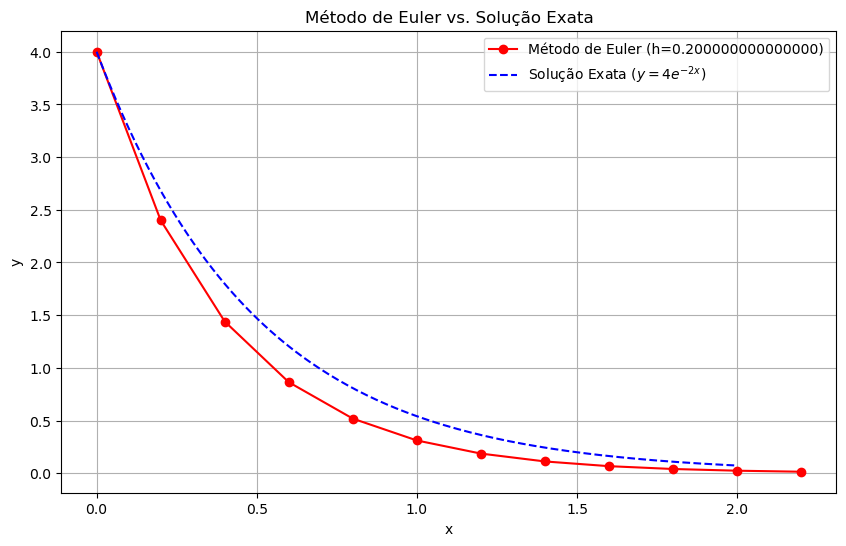

Comparação de resultados para x = 2.00000000000000:
  - Solução de Euler: y(2.00000000000000) ≈ 0.0145
  - Solução Exata:    y(2.00000000000000) = 0.0733


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Defina a EDO na forma dy/dx = f(x, y)
def f(x, y):
    """
    Esta é a função que representa a EDO.
    Para o nosso exemplo: dy/dx = -2y.
    Note que a função não depende de x neste caso específico.
    """
    return -2 * y

# 2. Implementação do Método de Euler
def metodo_euler(f, x0, y0, x_final, h):
    """
    Calcula a solução de uma EDO usando o Método de Euler.

    Argumentos:
    f: A função da EDO, f(x, y).
    x0: Condição inicial para x.
    y0: Condição inicial para y.
    x_final: O valor final de x para o qual a solução é calculada.
    h: O tamanho do passo.

    Retorna:
    (x_pontos, y_pontos): Tupla com as listas de pontos x e y da solução.
    """
    # Cria listas para armazenar os pontos da solução, começando com os valores iniciais
    x_pontos = [x0]
    y_pontos = [y0]

    # Define os valores atuais de x e y
    xi = x0
    yi = y0

    # 3. Loop iterativo para calcular cada passo
    while xi < x_final:
        # Fórmula de Euler para encontrar o próximo y
        yi = yi + h * f(xi, yi)
        
        # Incrementa x pelo tamanho do passo
        xi = xi + h
        
        # Armazena os novos pontos
        x_pontos.append(xi)
        y_pontos.append(yi)
        
    return np.array(x_pontos), np.array(y_pontos)

# --- Configuração do Problema ---
X0 = 0.0          # Valor inicial de x
Y0 = 4.0          # Valor inicial de y (y(0) = 4)
X_FINAL = 2.0     # Valor final de x
H = 0.2           # Tamanho do passo (experimente mudar para 0.1 ou 0.01 para ver a melhora)

# --- Execução e Visualização ---

# Calcula a solução aproximada usando o Método de Euler
x_euler, y_euler = metodo_euler(f, X0, Y0, X_FINAL, H)

# Calcula a solução exata para comparação
x_exato = np.linspace(X0, X_FINAL, 200)
y_exato = 4 * np.exp(-2 * x_exato)

# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, 'o-', label=f'Método de Euler (h={H})', color='red')
plt.plot(x_exato, y_exato, label='Solução Exata ($y=4e^{-2x}$)', color='blue', linestyle='--')
plt.title('Método de Euler vs. Solução Exata')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Imprime alguns valores para comparação direta
print(f"Comparação de resultados para x = {X_FINAL}:")
print(f"  - Solução de Euler: y({X_FINAL}) ≈ {y_euler[-1]:.4f}")
print(f"  - Solução Exata:    y({X_FINAL}) = {y_exato[-1]:.4f}")

In [2]:
# --- Configurações Iniciais ---
# Número de iterações para as séries mais lentas
n_iteracoes = 100

# Usaremos um número muito pequeno de iterações para Ramanujan, pois converge muito rápido
n_iteracoes_ramanujan = 2  # Apenas 3 termos (k=0, 1, 2) já dão uma precisão incrível

# Define a precisão dos cálculos para evitar erros de ponto flutuante
precisao_bits = 200
R = RealField(precisao_bits)
pi_real = R(pi)


# --- Funções para Calcular as Séries ---

def serie_leibniz(n_max):
    """Calcula a aproximação de Pi usando a série de Leibniz."""
    soma = R(0)
    aproximacoes = []
    for k in range(n_max + 1):
        termo = R(4 * (-1)^k / (2*k + 1))
        soma += termo
        aproximacoes.append(soma)
    return aproximacoes

def serie_nilakantha(n_max):
    """Calcula a aproximação de Pi usando a série de Nilakantha."""
    soma = R(3)
    aproximacoes = [soma]
    for k in range(1, n_max + 1):
        termo = R(4 * (-1)^(k+1) / ((2*k) * (2*k+1) * (2*k+2)))
        soma += termo
        aproximacoes.append(soma)
    return aproximacoes

def serie_euler_basel(n_max):
    """Calcula a aproximação de Pi usando a solução de Euler para o Problema de Basel."""
    soma = R(0)
    aproximacoes = []
    for k in range(1, n_max + 1):
        termo = R(1 / k^2)
        soma += termo
        # A aproximação de pi é sqrt(6 * soma)
        aproximacoes.append(sqrt(6 * soma))
    return aproximacoes

def serie_ramanujan(n_max):
    """Calcula a aproximação de Pi usando a série de Ramanujan."""
    soma = R(0)
    constante = R(2 * sqrt(2) / 9801)
    aproximacoes = []
    for k in range(n_max + 1):
        numerador = factorial(4*k) * (1103 + 26390*k)
        denominador = factorial(k)^4 * 396^(4*k)
        termo = R(numerador) / R(denominador)
        soma += termo
        # A série calcula 1/pi, então invertemos o resultado
        pi_aprox = 1 / (constante * soma)
        aproximacoes.append(pi_aprox)
    return aproximacoes

# --- Geração dos Dados e Cálculo do Erro ---

# Calcula as aproximações para cada método
aprox_leibniz = serie_leibniz(n_iteracoes)
aprox_nilakantha = serie_nilakantha(n_iteracoes)
aprox_euler = serie_euler_basel(n_iteracoes)
aprox_ramanujan = serie_ramanujan(n_iteracoes_ramanujan)

# Calcula o erro absoluto para cada aproximação
erros_leibniz = [abs(aprox - pi_real) for aprox in aprox_leibniz]
erros_nilakantha = [abs(aprox - pi_real) for aprox in aprox_nilakantha]
erros_euler = [abs(aprox - pi_real) for aprox in aprox_euler]
erros_ramanujan = [abs(aprox - pi_real) for aprox in aprox_ramanujan]

# --- Criação do Gráfico ---

# Gráfico para as séries mais lentas
p_leibniz = list_plot(erros_leibniz, plotjoined=True, color='red', legend_label='Leibniz')
p_nilakantha = list_plot(erros_nilakantha, plotjoined=True, color='green', legend_label='Nilakantha')
p_euler = list_plot(erros_euler, plotjoined=True, color='blue', legend_label='Euler (Basel)')

# Gráfico para a série de Ramanujan (em um plot separado para clareza visual)
# Usamos marker 'o' para ver os pontos, já que são poucos
p_ramanujan = list_plot(erros_ramanujan, plotjoined=True, color='orange', marker='o', legend_label='Ramanujan')


# Combina todos os gráficos em um só
grafico_final = p_leibniz + p_nilakantha + p_euler + p_ramanujan

# Configurações finais do gráfico
grafico_final.set_legend_options(loc='upper right')
grafico_final.set_axes_range(ymin=1e-18) # Define um limite mínimo para o erro no eixo y
grafico_final.title("Comparação da Convergência de Métodos para Calcular $\pi$")
grafico_final.axes_labels(["Número de Iterações (Termos)", "Erro Absoluto (Escala Logarítmica)"])
grafico_final.set_scale('semilogy') # ESSENCIAL: define a escala logarítmica para o eixo y

# Exibe o gráfico
grafico_final.show()

<>:94: DeprecationWarning: invalid escape sequence '\p'
<>:94: DeprecationWarning: invalid escape sequence '\p'
/tmp/ipykernel_26449/2251018999.py:94: DeprecationWarning: invalid escape sequence '\p'
  grafico_final.title("Comparação da Convergência de Métodos para Calcular $\pi$")
/tmp/ipykernel_26449/2251018999.py:94: DeprecationWarning: invalid escape sequence '\p'
  grafico_final.title("Comparação da Convergência de Métodos para Calcular $\pi$")


AttributeError: 'Graphics' object has no attribute 'title'